**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
#%%pycodestyle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase
from sklearn.neighbors.base import KNeighborsMixin
from sklearn.neighbors.base import SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = np.float64(X.copy())
        self.classes, self.y = np.unique(y, return_inverse=True)

    def predict_classes(self, dist):
        x_sorted_ind = np.argsort(dist, axis=0)
        x_kn_ind = x_sorted_ind[0:self.n_neighbors, :]

        return self.classes[self.y[x_kn_ind]].T

    @staticmethod
    def distance(X1, X2):
        return np.sqrt(((X1 - X2) ** 2).sum(axis=1))

    def predict_proba(self, X):
        dist = cdist(self.X, X)
        # or user distance
        # dist = np.transpose([self.distance(i, self.X) for i in X])

        pred_classes = self.predict_classes(dist)
        
        counts_rows = pred_classes.shape[0]
        counts_cols = self.classes.shape[0]
        
        counts = np.zeros((counts_rows, counts_cols), dtype=int)

        i = 0
        for row in pred_classes:
            uniq, cnts = np.unique(row, return_counts=1)
            counts[i][uniq.astype(np.int)] = cnts
            i += 1

        return counts / self.n_neighbors

    def predict(self, X):
        proba = self.predict_proba(X)

        return self.classes[np.argsort(proba, axis=1)[:, -1:]].ravel()

    def score(self, X, y):
        diff = np.count_nonzero(y - self.predict(X))

        return 1 - diff / y.shape[0]


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 579 µs, sys: 3.54 ms, total: 4.12 ms
Wall time: 4.71 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.12 ms, sys: 138 µs, total: 1.26 ms
Wall time: 1.45 ms


In [8]:
%time clf.predict(X_test)

CPU times: user 2.44 ms, sys: 304 µs, total: 2.75 ms
Wall time: 2.91 ms


array([0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 5.79 ms


array([0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 2.36 ms, sys: 0 ns, total: 2.36 ms
Wall time: 2.47 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 3.13 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

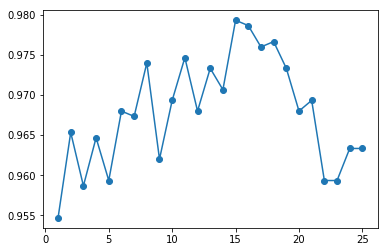

Best score: 0.979 at n = 14


In [14]:
# Задание 3
max_neighbors = 25
n_trials = 100

score = np.zeros(n_trials)
score_means = np.zeros(max_neighbors)

for n in range(1, max_neighbors+1):
    for i in range(n_trials):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        
        score[i] = my_clf.score(X_test, y_test)
        
    score_means[n-1] = score.mean()

plt.plot(range(1, max_neighbors+1), score_means, marker='o')
plt.show()

print("Best score:", np.round(np.max(score_means), 3), "at n =", np.argmax(score_means))

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 3min 2s, sys: 1.55 s, total: 3min 4s
Wall time: 3min 5s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 180 ms, sys: 360 ms, total: 540 ms
Wall time: 543 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 3min 34s, sys: 304 ms, total: 3min 34s
Wall time: 3min 35s


array([5., 5., 8., 8., 1., 2., 1., 8., 5., 8., 8., 4., 5., 8., 8., 6., 1.,
       8., 6., 0., 0., 1., 3., 4., 5., 1., 1., 7., 9., 1., 7., 9., 2., 0.,
       9., 5., 3., 3., 7., 6., 1., 0., 5., 1., 7., 7., 8., 5., 9., 2., 1.,
       9., 5., 7., 0., 4., 6., 3., 0., 8., 9., 1., 1., 6., 5., 7., 3., 8.,
       2., 1., 9., 4., 0., 6., 6., 6., 2., 9., 2., 3., 8., 4., 7., 7., 1.,
       1., 3., 9., 0., 1., 8., 5., 9., 3., 6., 7., 2., 0., 6., 5., 4., 7.,
       0., 4., 3., 7., 6., 5., 4., 6., 1., 6., 1., 6., 4., 3., 9., 9., 8.,
       7., 3., 8., 8., 0., 3., 7., 3., 5., 7., 1., 3., 0., 9., 0., 3., 2.,
       8., 2., 1., 5., 5., 3., 9., 3., 5., 2., 4., 0., 3., 4., 7., 6., 9.,
       3., 3., 4., 7., 4., 4., 2., 5., 8., 4., 6., 6., 9., 4., 2., 3., 9.,
       4., 0., 6., 6., 4., 4., 8., 3., 1., 2., 8., 5., 1., 9., 0., 6., 7.,
       1., 2., 3., 9., 8., 8., 2., 7., 8., 8., 5., 4., 7., 4., 1., 7., 1.,
       4., 6., 1., 6., 7., 2., 0., 7., 0., 6., 9., 1., 1., 6., 7., 8., 3.,
       4., 6., 9., 0., 7.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2min 1s, sys: 1.66 s, total: 2min 3s
Wall time: 2min 4s


array([5., 5., 8., 8., 1., 2., 1., 8., 5., 8., 8., 4., 5., 8., 8., 6., 1.,
       8., 6., 0., 0., 1., 3., 4., 5., 1., 1., 7., 9., 1., 7., 9., 2., 0.,
       9., 5., 3., 3., 7., 6., 1., 0., 5., 1., 7., 7., 8., 5., 9., 2., 1.,
       9., 5., 7., 0., 4., 6., 3., 0., 8., 9., 1., 1., 6., 6., 7., 3., 8.,
       2., 1., 9., 4., 0., 6., 6., 6., 2., 9., 2., 3., 8., 4., 7., 7., 1.,
       1., 3., 9., 0., 1., 8., 5., 9., 3., 6., 7., 8., 0., 6., 5., 4., 7.,
       0., 4., 3., 7., 6., 8., 4., 6., 1., 6., 1., 6., 4., 3., 9., 9., 8.,
       7., 3., 8., 8., 0., 3., 7., 3., 5., 7., 1., 8., 0., 9., 0., 3., 2.,
       8., 2., 1., 5., 5., 3., 9., 8., 5., 2., 4., 0., 3., 4., 7., 6., 9.,
       3., 3., 4., 7., 4., 4., 2., 5., 8., 4., 6., 6., 9., 4., 2., 3., 9.,
       4., 0., 6., 6., 4., 4., 9., 3., 1., 2., 8., 5., 1., 9., 0., 6., 7.,
       1., 2., 3., 9., 8., 8., 2., 7., 8., 8., 5., 9., 7., 4., 1., 7., 1.,
       4., 6., 1., 6., 7., 2., 0., 7., 0., 6., 9., 1., 1., 6., 7., 8., 3.,
       4., 6., 9., 0., 7.

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 3min 36s, sys: 256 ms, total: 3min 36s
Wall time: 3min 37s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 57s, sys: 1.7 s, total: 1min 59s
Wall time: 2min


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9642857142857143

In [25]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [26]:
# seaborn - обёртка над matplotlib; 
#           улучшена в плане дизайна;
#           оптимизирована для визуализации статистических моделей;
# matplotlib - библиотека для визуализации и построения графиков;
# train_test_split - разбивает данные на обучающую/тестовую выборки в заданном отношении;
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - позволяет объединить последовательность 
#           действий (конвейер)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - масштабируюшая нормализация:
#           из каждого признака вычитается его среднее и делится на стандартное отклонение
# ClassifierMixin - базовый класс классификаторов
# NeighborsBase - базовый класс KNN
# KNeighborsMixin - класс KNN;
#                   содержит функции kneighbors (поиск k ближайших соседей) и 
#                   kneighbors_graph (матрица связей)
# SupervisedIntegerMixin - класс, содержащий метод fit, позволяющий обучить классификатор;

In [27]:
# EOF